In [1]:
import numpy as np
import pandas as pd

In [2]:
CCTV_Seoul = pd.read_csv('data/서울시CCTV설치운영현황(자치구)_년도별_210731기준.csv', encoding = 'cp949', skiprows = [0,2])
CCTV_Seoul.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,"1,772",813,0,0,210,150,1,261,85,9,200,43
1,중 구,"2,333",16,114,87,77,236,240,372,386,155,361,289
2,용산구,"2,383",34,71,234,125,221,298,351,125,307,617,0
3,성동구,"3,602",448,125,212,105,339,310,874,390,262,461,76
4,광진구,"2,588",35,57,100,187,98,52,675,465,712,175,32


In [3]:
CCTV_Seoul.columns

Index(['구분', '총계', '2012년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년'],
      dtype='object')

In [4]:
CCTV_Seoul.columns[11]

'2020년'

In [5]:
# 기관명 => 구별
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '자치구',
                          CCTV_Seoul.columns[11] : '2020CCTV'}, inplace=True)
CCTV_Seoul.head()

,자치구,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020CCTV,2021년
0,종로구,"1,772",813,0,0,210,150,1,261,85,9,200,43
1,중 구,"2,333",16,114,87,77,236,240,372,386,155,361,289
2,용산구,"2,383",34,71,234,125,221,298,351,125,307,617,0
3,성동구,"3,602",448,125,212,105,339,310,874,390,262,461,76
4,광진구,"2,588",35,57,100,187,98,52,675,465,712,175,32


In [6]:
CCTV_Seoul = CCTV_Seoul[['자치구','2020CCTV']]
CCTV_Seoul

,자치구,2020CCTV
0,종로구,200
1,중 구,361
2,용산구,617
3,성동구,461
4,광진구,175
5,동대문구,223
6,중랑구,939
7,성북구,251
8,강북구,588
9,도봉구,168


In [7]:
pop_Seoul = pd.read_excel('data/population_in_Seoul_2020.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020.4/4,합계,4417954,9911088,4816522,5094566,9668465,4701723,4966742,242623,114799,127824,2.19,1568331
3,2020.4/4,종로구,75003,158996,76876,82120,149384,72635,76749,9612,4241,5371,1.99,28507
4,2020.4/4,중구,63686,134635,65776,68859,125240,61222,64018,9395,4554,4841,1.97,24495


In [8]:
pop_Seoul = pd.read_excel('data/population_in_Seoul_2020.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,9911088,9668465,242623,1568331
1,종로구,158996,149384,9612,28507
2,중구,134635,125240,9395,24495
3,용산구,244645,230040,14605,40247
4,성동구,300505,293556,6949,45603


In [9]:
# 인구수계= 한국인수+외국인
pop_Seoul.rename(columns={pop_Seoul.columns[1] : '인구수' }, inplace=True)
pop_Seoul.head()

,자치구,인구수,계.1,계.2,65세이상고령자
0,합계,9911088,9668465,242623,1568331
1,종로구,158996,149384,9612,28507
2,중구,134635,125240,9395,24495
3,용산구,244645,230040,14605,40247
4,성동구,300505,293556,6949,45603


In [10]:
pop_Seoul.drop([0], inplace=True)
del pop_Seoul['계.1']
del pop_Seoul['계.2']
del pop_Seoul['65세이상고령자']
pop_Seoul.head()

,자치구,인구수
1,종로구,158996
2,중구,134635
3,용산구,244645
4,성동구,300505
5,광진구,360109


In [11]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='자치구')
data_result.head()

,자치구,2020CCTV,인구수
0,종로구,200,158996
1,용산구,617,244645
2,성동구,461,300505
3,광진구,175,360109
4,동대문구,223,357014


In [12]:
data_result.set_index('자치구', inplace=True)
data_result.head()

,2020CCTV,인구수
자치구,,
종로구,200,158996
용산구,617,244645
성동구,461,300505
광진구,175,360109
동대문구,223,357014


In [13]:
crime_anal_raw = pd.read_excel('data/Report.xls', sheet_name='Sheet1', thousands=',', index_col=0)

crime_anal = pd.pivot_table(crime_anal_raw, index='자치구', aggfunc=np.sum)

crime_anal.head()

,강간강제추행,강간강제추행.1,강도,강도.1,살인,살인.1,절도,절도.1,폭력,폭력.1,합계,합계.1
자치구,,,,,,,,,,,,
강남구,708,627,14,11,6,5,2951,1491,3677,3111,7356,5245
강동구,188,167,15,14,3,3,1640,781,1942,1697,3788,2662
강북구,159,132,5,4,9,8,780,490,1817,1625,2770,2259
강서구,265,222,6,5,10,9,1689,1070,2445,2087,4415,3393
관악구,403,351,3,3,12,12,2229,1137,2614,1370,5261,3858


In [14]:
crime_anal.rename(columns = {'강간강제추행':'강간 발생', 
                             '강간강제추행.1':'강간 검거', 
                             '강도':'강도 발생', 
                             '강도.1':'강도 검거', 
                             '살인':'살인 발생', 
                             '살인.1':'살인 검거',
                            '절도':'절도 발생', 
                             '절도.1':'절도 검거',
                            '폭력':'폭력 발생', 
                             '폭력.1':'폭력 검거'}, inplace=True)
del crime_anal['합계']
del crime_anal['합계.1']
crime_anal.head()

,강간 발생,강간 검거,강도 발생,강도 검거,살인 발생,살인 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
자치구,,,,,,,,,,
강남구,708,627,14,11,6,5,2951,1491,3677,3111
강동구,188,167,15,14,3,3,1640,781,1942,1697
강북구,159,132,5,4,9,8,780,490,1817,1625
강서구,265,222,6,5,10,9,1689,1070,2445,2087
관악구,403,351,3,3,12,12,2229,1137,2614,1370


In [15]:
crime_anal.dtypes

강간 발생    object
강간 검거    object
강도 발생    object
강도 검거    object
살인 발생    object
살인 검거    object
절도 발생    object
절도 검거    object
폭력 발생    object
폭력 검거    object
dtype: object

In [16]:
crime_anal = crime_anal.apply(pd.to_numeric, errors = 'coerce')
crime_anal.dtypes

강간 발생    float64
강간 검거    float64
강도 발생    float64
강도 검거    float64
살인 발생    float64
살인 검거    float64
절도 발생    float64
절도 검거    float64
폭력 발생    float64
폭력 검거    float64
dtype: object

In [17]:
crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생']*100

del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,708.0,14.0,6.0,2951.0,3677.0,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188.0,15.0,3.0,1640.0,1942.0,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159.0,5.0,9.0,780.0,1817.0,83.018868,80.000000,88.888889,62.820513,89.433132
강서구,265.0,6.0,10.0,1689.0,2445.0,83.773585,83.333333,90.000000,63.351095,85.357873
관악구,403.0,3.0,12.0,2229.0,2614.0,87.096774,100.000000,100.000000,51.009421,52.410099


In [18]:
con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100
    
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,708.0,14.0,6.0,2951.0,3677.0,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188.0,15.0,3.0,1640.0,1942.0,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159.0,5.0,9.0,780.0,1817.0,83.018868,80.000000,88.888889,62.820513,89.433132
강서구,265.0,6.0,10.0,1689.0,2445.0,83.773585,83.333333,90.000000,63.351095,85.357873
관악구,403.0,3.0,12.0,2229.0,2614.0,87.096774,100.000000,100.000000,51.009421,52.410099


In [19]:
crime_anal.rename(columns = {'강간 발생':'강간', 
                             '강도 발생':'강도', 
                             '살인 발생':'살인', 
                             '절도 발생':'절도', 
                             '폭력 발생':'폭력'}, inplace=True)
crime_anal.drop(['자치구'], inplace=True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,708.0,14.0,6.0,2951.0,3677.0,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188.0,15.0,3.0,1640.0,1942.0,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159.0,5.0,9.0,780.0,1817.0,83.018868,80.000000,88.888889,62.820513,89.433132
강서구,265.0,6.0,10.0,1689.0,2445.0,83.773585,83.333333,90.000000,63.351095,85.357873
관악구,403.0,3.0,12.0,2229.0,2614.0,87.096774,100.000000,100.000000,51.009421,52.410099


In [20]:
from sklearn import preprocessing

col = ['강간', '강도', '살인', '절도', '폭력']

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index = crime_anal.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,0.110192,0.094891,0.035714,0.057873,0.052079,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,0.018659,0.102190,0.014286,0.022925,0.015259,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,0.013554,0.029197,0.057143,0.000000,0.012606,83.018868,80.000000,88.888889,62.820513,89.433132
강서구,0.032213,0.036496,0.064286,0.024232,0.025933,83.773585,83.333333,90.000000,63.351095,85.357873
관악구,0.056504,0.014599,0.078571,0.038627,0.029520,87.096774,100.000000,100.000000,51.009421,52.410099


In [21]:
crime_anal_norm[['인구수', 'CCTV']] = data_result[['인구수','2020CCTV']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
자치구,,,,,,,,,,,,
강남구,0.110192,0.094891,0.035714,0.057873,0.052079,88.559322,78.571429,83.333333,50.525246,84.607017,544055.0,942
강동구,0.018659,0.102190,0.014286,0.022925,0.015259,88.829787,93.333333,100.000000,47.621951,87.384140,463998.0,614
강북구,0.013554,0.029197,0.057143,0.000000,0.012606,83.018868,80.000000,88.888889,62.820513,89.433132,311569.0,588
강서구,0.032213,0.036496,0.064286,0.024232,0.025933,83.773585,83.333333,90.000000,63.351095,85.357873,585901.0,356
관악구,0.056504,0.014599,0.078571,0.038627,0.029520,87.096774,100.000000,100.000000,51.009421,52.410099,509803.0,331


In [22]:
col = ['강간','강도','살인','절도','폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
자치구,,,,,,,,,,,,,
강남구,0.110192,0.094891,0.035714,0.057873,0.052079,88.559322,78.571429,83.333333,50.525246,84.607017,544055.0,942,0.350749
강동구,0.018659,0.102190,0.014286,0.022925,0.015259,88.829787,93.333333,100.000000,47.621951,87.384140,463998.0,614,0.173318
강북구,0.013554,0.029197,0.057143,0.000000,0.012606,83.018868,80.000000,88.888889,62.820513,89.433132,311569.0,588,0.112500
강서구,0.032213,0.036496,0.064286,0.024232,0.025933,83.773585,83.333333,90.000000,63.351095,85.357873,585901.0,356,0.183160
관악구,0.056504,0.014599,0.078571,0.038627,0.029520,87.096774,100.000000,100.000000,51.009421,52.410099,509803.0,331,0.217820


In [23]:
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
자치구,,,,,,,,,,,,,,
강남구,0.110192,0.094891,0.035714,0.057873,0.052079,88.559322,78.571429,83.333333,50.525246,84.607017,544055.0,942,0.350749,385.596346
강동구,0.018659,0.102190,0.014286,0.022925,0.015259,88.829787,93.333333,100.000000,47.621951,87.384140,463998.0,614,0.173318,417.169212
강북구,0.013554,0.029197,0.057143,0.000000,0.012606,83.018868,80.000000,88.888889,62.820513,89.433132,311569.0,588,0.112500,404.161401
강서구,0.032213,0.036496,0.064286,0.024232,0.025933,83.773585,83.333333,90.000000,63.351095,85.357873,585901.0,356,0.183160,405.815887
관악구,0.056504,0.014599,0.078571,0.038627,0.029520,87.096774,100.000000,100.000000,51.009421,52.410099,509803.0,331,0.217820,390.516295


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


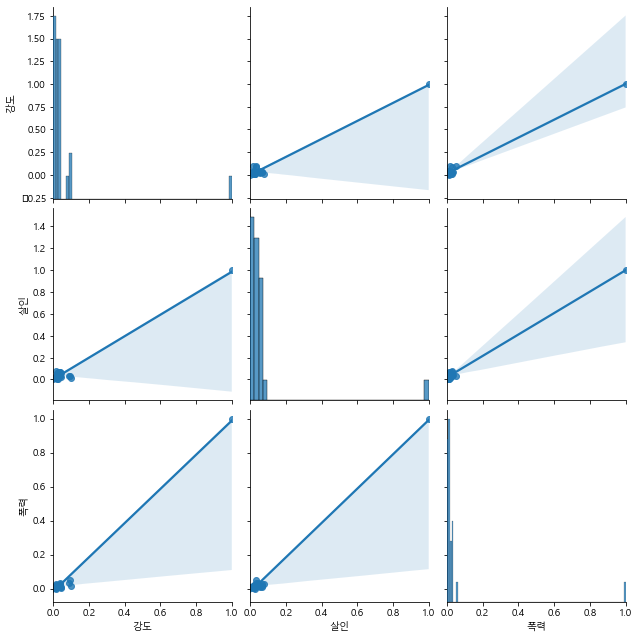

In [25]:
sns.pairplot(crime_anal_norm, vars=["강도", "살인", "폭력"], kind='reg', size=3)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

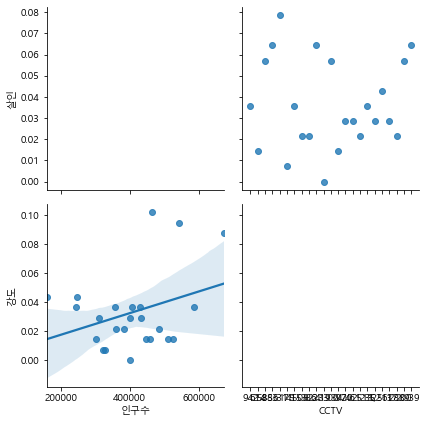

In [26]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], 
             y_vars=["살인", "강도"], kind='reg', size=3)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

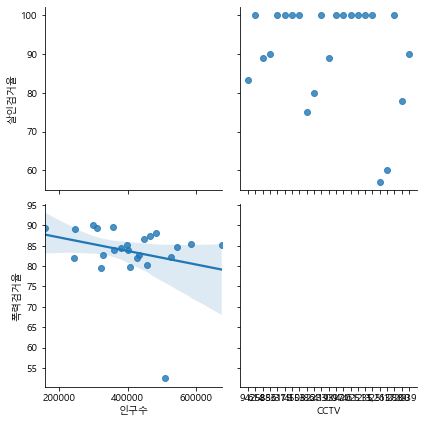

In [27]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], 
             y_vars=["살인검거율", "폭력검거율"], kind='reg', size=3)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

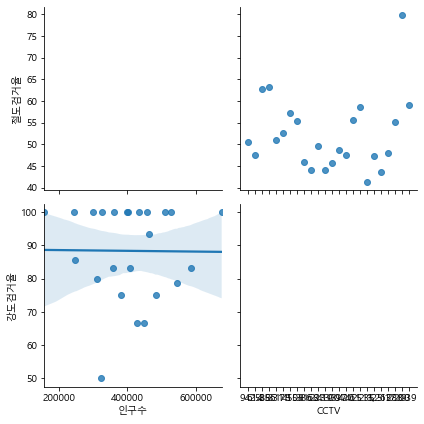

In [28]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], 
             y_vars=["절도검거율", "강도검거율"], kind='reg', size=3)
plt.show()

In [29]:
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
자치구,,,,,,,,,,,,,,
종로구,0.019363,0.043796,0.057143,0.010743,0.010356,100.000000,100.000000,77.777778,79.797126,89.304500,158996.0,200,0.141401,100.000000
성동구,0.005809,0.014599,0.028571,0.006291,0.000000,85.217391,100.000000,100.000000,55.610236,90.188062,300505.0,461,0.055270,96.450113
광진구,0.030452,0.021898,0.007143,0.023565,0.009614,87.843137,100.000000,100.000000,52.524038,83.949881,360109.0,175,0.092672,94.951133
중랑구,0.017779,0.029197,0.064286,0.019353,0.016956,83.606557,100.000000,90.000000,59.030544,85.262117,399562.0,939,0.147571,93.514987
강동구,0.018659,0.102190,0.014286,0.022925,0.015259,88.829787,93.333333,100.000000,47.621951,87.384140,463998.0,614,0.173318,93.351631


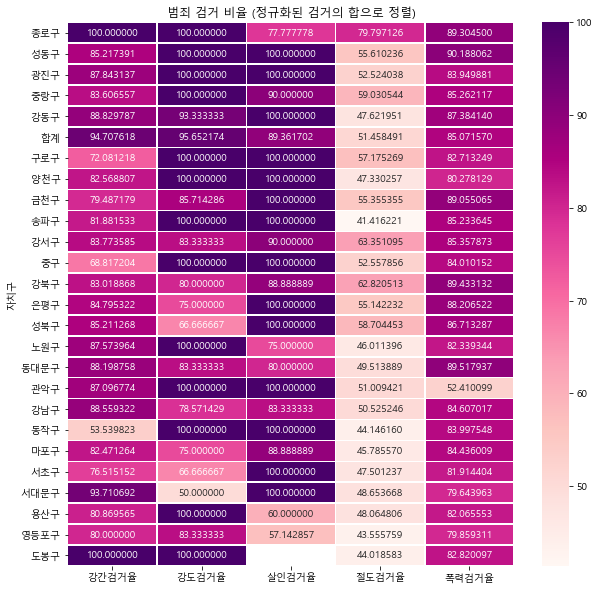

In [30]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', 
                    linewidths=.5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

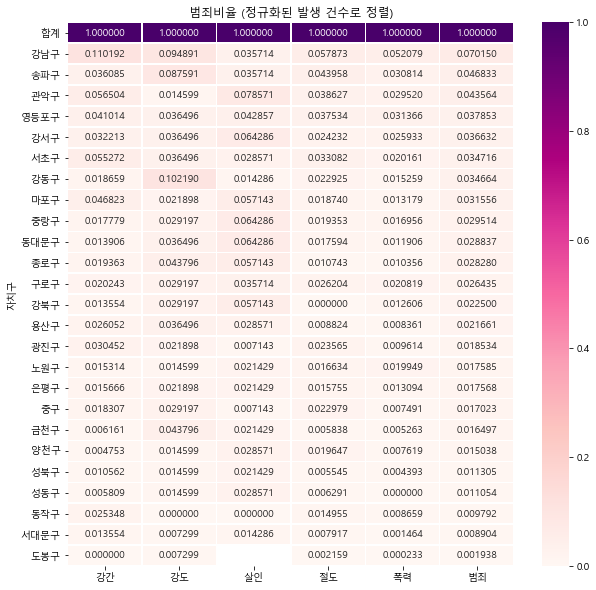

In [31]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5,
                       cmap='RdPu')
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

In [32]:
crime_anal_norm.to_csv('data/2020_crime_in_Seoul_final.csv', sep=',', 
                       encoding='utf-8')